# Name: Nick Pittman
# Project \#1
Dataset Selection: [Heart Failure Prediction](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
heart = pd.read_csv('/content/drive/MyDrive/Datasets/heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Problem:
Which dataset are you going to use? What questions are you going to ask about this dataset? Make sure that you can answer the question using ML models. What are your predictor variables and target variable?

The dataset I have decided to use for this project is the <i>Heart Failure Prediction</i> dataset. My goal for this assignment is simple–what is the highest accuracy I can achieve for predicting the presence of heart disease? Reasonably, the target variable for this experiment will be the `HeartDisease` column (labeling the appearance of heart disease as 1), with the predictor variables being the `Age`, `Sex`, `ChestPainType`, `Oldpeak`, `ST_Slope`, and `ExerciseAngina`.

# Data Preparation
Explain your data prep. What did you do to get your data in the shape for your experiments? (e.g. creation of dummy variables, filling in missing values, etc).

To prep my data for this experiment I checked for any missing values, examined for any potential outliers, and created dummy variables for the categorical features. Fortunately, there was no missing data and each data point (categorical and numerical) fell within a reasonable range of values. Therefore, the only modification I needed to make was to create dummy variables for the `Sex`, `ChestPainType`, `ST_Slope`, and `ExerciseAngina` columns.

In [ ]:
# data prep code
# subsetting the original dataset to the desired variables
heart = heart[["Age", "Sex", "ChestPainType", "Oldpeak", "ST_Slope", "ExerciseAngina", "HeartDisease"]]
heart.head(10)

,Age,Sex,ChestPainType,Oldpeak,ST_Slope,ExerciseAngina,HeartDisease
0,40,M,ATA,0.0,Up,N,0
1,49,F,NAP,1.0,Flat,N,1
2,37,M,ATA,0.0,Up,N,0
3,48,F,ASY,1.5,Flat,Y,1
4,54,M,NAP,0.0,Up,N,0
5,39,M,NAP,0.0,Up,N,0
6,45,F,ATA,0.0,Up,N,0
7,54,M,ATA,0.0,Up,N,0
8,37,M,ASY,1.5,Flat,Y,1
9,48,F,ATA,0.0,Up,N,0


In [ ]:
# check for any missing data
heart.isna().any()

Age               False
Sex               False
ChestPainType     False
Oldpeak           False
ST_Slope          False
ExerciseAngina    False
HeartDisease      False
dtype: bool

In [ ]:
# check for any outliers or inconsistent categorical values
sexes = heart['Sex'].unique()
chestpains = heart['ChestPainType'].unique()
slopes = heart['ST_Slope'].unique()
angina = heart['ExerciseAngina'].unique()

print("Age range: ", "\t\t", heart['Age'].min(), "-", heart['Age'].max())
print("Sexes: ", "\t\t", sexes)
print("Chest pain types: ", "\t", chestpains)
print("Oldpeak range: ", "\t", heart['Oldpeak'].min(), "-", heart['Oldpeak'].max())
print("ST_Slope types: ", "\t", slopes)
print("Exercise Angina: ", "\t", angina)
# Conclusion: no outliers or inconsistent data

Age range:  		 28 - 77
Sexes:  		 ['M' 'F']
Chest pain types:  	 ['ATA' 'NAP' 'ASY' 'TA']
Oldpeak range:  	 -2.6 - 6.2
ST_Slope types:  	 ['Up' 'Flat' 'Down']
Exercise Angina:  	 ['N' 'Y']


In [ ]:
# creating dummy variables
heart = pd.get_dummies(heart, columns = ["Sex", "ChestPainType", "ST_Slope", "ExerciseAngina"])
heart.head(10)

,Age,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_N,ExerciseAngina_Y
0,40,0.0,0,0,1,0,1,0,0,0,0,1,1,0
1,49,1.0,1,1,0,0,0,1,0,0,1,0,1,0
2,37,0.0,0,0,1,0,1,0,0,0,0,1,1,0
3,48,1.5,1,1,0,1,0,0,0,0,1,0,0,1
4,54,0.0,0,0,1,0,0,1,0,0,0,1,1,0
5,39,0.0,0,0,1,0,0,1,0,0,0,1,1,0
6,45,0.0,0,1,0,0,1,0,0,0,0,1,1,0
7,54,0.0,0,0,1,0,1,0,0,0,0,1,1,0
8,37,1.5,1,0,1,1,0,0,0,0,1,0,0,1
9,48,0.0,0,1,0,0,1,0,0,0,0,1,1,0


# Metrics
Identify which metrics you will be using to test your model and say why they are appropriate.

The metrics I will be using to test my model will be percent accuracy and confusion matrices. Since my predictor variable is categorical, calculating the frequency at which my model correctly predicts the appearance of heart disease is the most logical. I can then use confusion matrices to analyze these predictions closer and specifically identify where my model is making mistakes.

In [ ]:
# import all metrics, includes accuracy_score and confusion matrices
from sklearn import metrics
# import pandas
import pandas as pd

# Baseline Performance
Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly? What did some of the unsuccessful machine learning algorithms yield?

Some helpful links:
- [Sklearn Dummy Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

I would expect this data to accurately predict at a rate no better than 50%. Without considering any of the underlying factors, the algorithm has an equal chance of predicting whether the individual has heart disease or not. Some of the most unsuccessful algorithms predicted at an accuracy as low as 46%, while some of the most successful reached an accuracy of 57%. On average, most predictions were in the 50-54% range.

In [ ]:
# build and test a baseline model here
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

predictors = heart.columns.drop("HeartDisease")
target = "HeartDisease"

train_data, test_data, train_sln, test_sln = train_test_split(heart[predictors], heart[target], test_size=.2, random_state=27)

dummy_base = DummyClassifier(strategy='stratified')
dummy_base.fit(train_data, train_sln)
dummy_pred = dummy_base.predict(test_data)

print("Baseline accuracy: ", metrics.accuracy_score(test_sln, dummy_pred))

#confusion matrix
labels= [0,1]
conf_mat = metrics.confusion_matrix(test_sln, dummy_pred, labels=labels)
print(pd.DataFrame(conf_mat, index=labels, columns=labels))

Baseline accuracy:  0.483695652173913
    0   1
0  29  54
1  41  60


# Model planning and Execution
Identify which learning algorithms you have tried and which important parameters you’ve tuned for each one.


### k-NN test <br>
#### Parameters tuned : value of k, distance formula

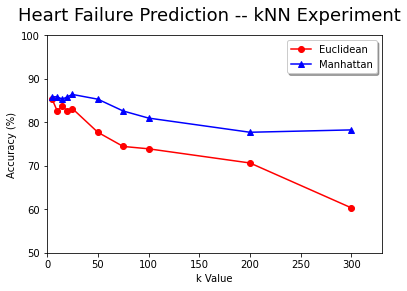

Best Euclidean k:  5
Best Euclidean accuracy:  0.8532608695652174
Best Manhattan k:  25
Best Manhattan accuracy:  0.8641304347826086


In [ ]:
# kNN test
from sklearn import neighbors
import matplotlib.pyplot as plt

k_vals = [5,10,15,20,25,50,75,100,200,300]
kNN_e_accuracies = []
kNN_m_accuracies = []
best_e_accuracy = 0
best_k_e = 0
best_m_accuracy = 0
best_k_m = 0
current_accuracy = 0
current_accuracy2 = 0

# Euclidean Distance
for k in k_vals:
  kNN_e = neighbors.KNeighborsClassifier(n_neighbors=k, p=2)
  kNN_e.fit(train_data, train_sln)
  kNN_e_pred = kNN_e.predict(test_data)
  current_accuracy = metrics.accuracy_score(test_sln, kNN_e_pred)
  if current_accuracy > best_e_accuracy:
    best_k_e = k
    best_e_accuracy = current_accuracy
  kNN_e_accuracies.append(current_accuracy*100)

# Manhattan Distance
for k in k_vals:
  kNN_m = neighbors.KNeighborsClassifier(n_neighbors=k, p=1)
  kNN_m.fit(train_data, train_sln)
  kNN_m_pred = kNN_m.predict(test_data)
  current_accuracy2 = metrics.accuracy_score(test_sln, kNN_m_pred)
  if current_accuracy2 > best_m_accuracy:
    best_k_m = k
    best_m_accuracy = current_accuracy2
  kNN_m_accuracies.append(current_accuracy2*100)

#plot graph
plt.suptitle('Heart Failure Prediction -- kNN Experiment',fontsize=18)
plt.xlabel('k Value')
plt.ylabel('Accuracy (%)')
plt.plot(k_vals,kNN_e_accuracies,'ro-',label='Euclidean')
plt.plot(k_vals,kNN_m_accuracies,'b^-',label='Manhattan')
plt.legend(loc='best', shadow=True)
plt.axis([0,330,50,100])
plt.show()

#Conclusion
print("Best Euclidean k: ", best_k_e)
print("Best Euclidean accuracy: ", best_e_accuracy)
print("Best Manhattan k: ", best_k_m)
print("Best Manhattan accuracy: ", best_m_accuracy)

### Weighted k-NN test
#### Parameters tuned: value of k, distance used

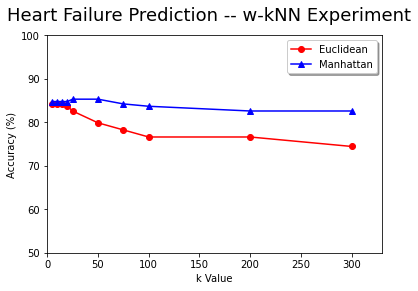

Best Euclidean k (weighted):  5
Best Euclidean accuracy (weighted):  0.842391304347826
Best Manhattan k (weighted):  25
Best Manhattan accuracy (weighted):  0.8532608695652174


In [ ]:
# w-kNN test
from sklearn import neighbors
import matplotlib.pyplot as plt

w_k_vals = [5,10,15,20,25,50,75,100,200,300]
w_kNN_e_accuracies = []
w_kNN_m_accuracies = []
best_we_accuracy = 0
best_k_we = 0
best_wm_accuracy = 0
best_k_wm = 0
current_accuracy = 0
current_accuracy2 = 0

# Euclidean Distance
for k in w_k_vals:
  w_kNN_e = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
  w_kNN_e.fit(train_data, train_sln)
  w_kNN_e_pred = w_kNN_e.predict(test_data)
  current_accuracy = metrics.accuracy_score(test_sln, w_kNN_e_pred)
  if current_accuracy > best_we_accuracy:
    best_k_we = k
    best_we_accuracy = current_accuracy
  w_kNN_e_accuracies.append(current_accuracy*100)

# Manhattan Distance
for k in w_k_vals:
  w_kNN_m = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
  w_kNN_m.fit(train_data, train_sln)
  w_kNN_m_pred = w_kNN_m.predict(test_data)
  current_accuracy2 = metrics.accuracy_score(test_sln, w_kNN_m_pred)
  if current_accuracy2 > best_wm_accuracy:
    best_k_wm = k
    best_wm_accuracy = current_accuracy2
  w_kNN_m_accuracies.append(current_accuracy2*100)

#graph
plt.suptitle('Heart Failure Prediction -- w-kNN Experiment',fontsize=18)
plt.xlabel('k Value')
plt.ylabel('Accuracy (%)')
plt.plot(k_vals,w_kNN_e_accuracies,'ro-',label='Euclidean')
plt.plot(k_vals,w_kNN_m_accuracies,'b^-',label='Manhattan')
plt.legend(loc='best', shadow=True)
plt.axis([0,330,50,100])
plt.show()

#Conclusion
print("Best Euclidean k (weighted): ", best_k_we)
print("Best Euclidean accuracy (weighted): ", best_we_accuracy)
print("Best Manhattan k (weighted): ", best_k_wm)
print("Best Manhattan accuracy (weighted): ", best_wm_accuracy)

### Decision Tree test
#### Parameters tuned: max_depth, max_leaf_nodes

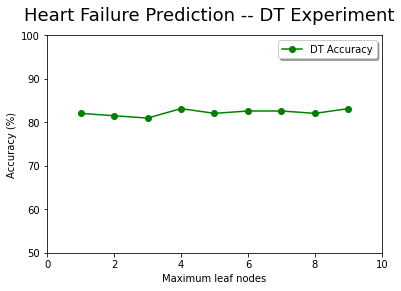

Best tree depth:  5
Best depth accuracy:  0.8097826086956522
Best leaf nodes:  4
Best leaf accuracy:  0.8315217391304348


In [ ]:
# Decision Tree test
from sklearn import tree

depths = [3,4,5,6,7,8,9,10,11,12]
depths_accuracy = []
best_depth = 0
best_depth_accuracy = 0
current_accuracy = 0
current_accuracy2 = 0

for depth in depths:
  dt = tree.DecisionTreeClassifier(criterion='entropy')
  dt.fit(train_data, train_sln)
  dt_pred = dt.predict(test_data)
  current_accuracy = metrics.accuracy_score(test_sln, dt_pred)
  if current_accuracy > best_depth_accuracy:
    best_depth = depth
    best_depth_accuracy = current_accuracy
  depths_accuracy.append(current_accuracy*100)

leaf_nodes = [1,2,3,4,5,6,7,8,9]
leaf_accuracy = []
best_leaf = 0
best_leaf_accuracy = 0

for leaf in leaf_nodes:
  dt2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
  dt2.fit(train_data, train_sln)
  dt2_pred = dt2.predict(test_data)
  current_accuracy2 = metrics.accuracy_score(test_sln, dt2_pred)
  if current_accuracy2 > best_leaf_accuracy:
    best_leaf = leaf
    best_leaf_accuracy = current_accuracy2
  leaf_accuracy.append(current_accuracy2*100)

#graph
plt.suptitle('Heart Failure Prediction -- DT Experiment',fontsize=18)
plt.xlabel('Maximum leaf nodes')
plt.ylabel('Accuracy (%)')
plt.plot(leaf_nodes, leaf_accuracy,'go-',label='DT Accuracy')
plt.legend(loc='best', shadow=True)
plt.axis([0,10,50,100])
plt.show()

#Conclusion
print("Best tree depth: ", best_depth)
print("Best depth accuracy: ", best_depth_accuracy)
print("Best leaf nodes: ", best_leaf)
print("Best leaf accuracy: ", best_leaf_accuracy)

###Random Forest Test <br>

####Parameters tuned: splitting metric, max number of features (m)

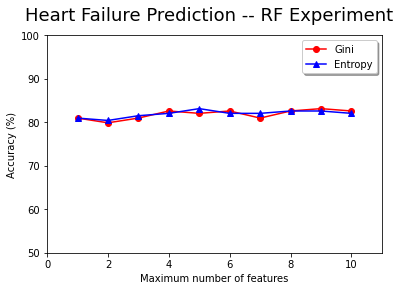

Best Gini m:  9
Best Gini accuracy:  0.8315217391304348
Best Entropy m:  5
Best Entropy accuracy:  0.8315217391304348


In [ ]:
# Random Forest test

from sklearn import ensemble

maxfeatures = [1,2,3,4,5,6,7,8,9,10]
rf1_gini_accuracies = []
rf2_entropy_accuracies = []
best_gini_accuracy = 0
best_entropy_accuracy = 0
best_gini_features = 0
best_entropy_features = 0
current_accuracy = 0
current_accuracy2 = 0

# Gini criterion
for m in maxfeatures:
  rf1 = ensemble.RandomForestClassifier(max_features = m)
  rf1.fit(train_data, train_sln)
  rf1_pred = rf1.predict(test_data)
  current_accuracy = metrics.accuracy_score(test_sln, rf1_pred)
  if current_accuracy > best_gini_accuracy:
    best_gini_features = m
    best_gini_accuracy = current_accuracy
  rf1_gini_accuracies.append(current_accuracy*100)

# Entropy criterion
for m in maxfeatures:
  rf2 = ensemble.RandomForestClassifier(criterion='entropy', max_features = m)
  rf2.fit(train_data, train_sln)
  rf2_pred = rf2.predict(test_data)
  current_accuracy2 = metrics.accuracy_score(test_sln, rf2_pred)
  if current_accuracy2 > best_entropy_accuracy:
    best_entropy_features = m
    best_entropy_accuracy = current_accuracy2
  rf2_entropy_accuracies.append(current_accuracy2*100)

#graph
plt.suptitle('Heart Failure Prediction -- RF Experiment',fontsize=18)
plt.xlabel('Maximum number of features')
plt.ylabel('Accuracy (%)')
plt.plot(maxfeatures,rf1_gini_accuracies,'ro-',label='Gini')
plt.plot(maxfeatures,rf2_entropy_accuracies,'b^-',label='Entropy')
plt.legend(loc='best', shadow=True)
plt.axis([0,11,50,100])
plt.show()

#Conclusion
print("Best Gini m: ", best_gini_features)
print("Best Gini accuracy: ", best_gini_accuracy)
print("Best Entropy m: ", best_entropy_features)
print("Best Entropy accuracy: ", best_entropy_accuracy)

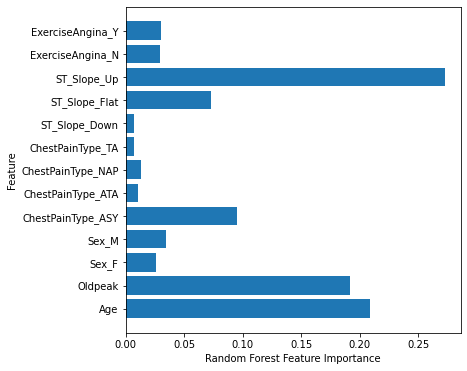

In [ ]:
# Feature Importances Chart - Gini RF

index = range(len(predictors))

plt.figure(figsize=(6,6))
plt.barh(index, rf1.feature_importances_) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors)
plt.xlabel("Random Forest Feature Importance")
plt.show()

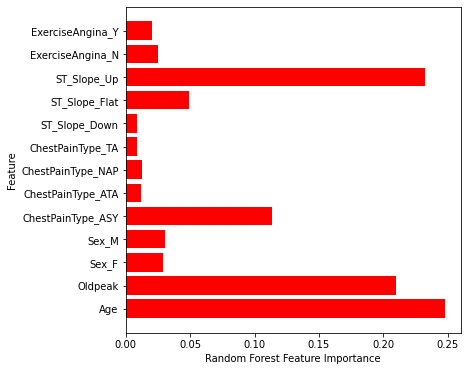

In [ ]:
# Feature Importances Chart - Entropy RF

index = range(len(predictors))

plt.figure(figsize=(6,6))
plt.barh(index, rf2.feature_importances_, color='red') #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors)
plt.xlabel("Random Forest Feature Importance")
plt.show()

## Normalization Experiments

In [ ]:
# Repeated experiments with normalization
# Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

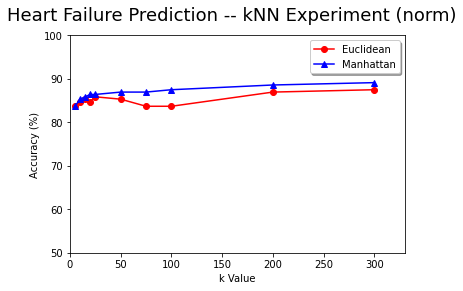

Best Euclidean k:  300
Best Euclidean accuracy:  0.875
Best Manhattan k:  300
Best Manhattan accuracy:  0.8913043478260869
    0   1
0  72  11
1   9  92


In [ ]:
# kNN experiment with normalization
k_vals = [5,10,15,20,25,50,75,100,200,300]
kNN_e_accuracies = []
kNN_m_accuracies = []
best_e_accuracy = 0
best_k_e = 0
best_m_accuracy = 0
best_k_m = 0
current_accuracy = 0
current_accuracy2 = 0

# Euclidean Distance
for k in k_vals:
  kNN_e = neighbors.KNeighborsClassifier(n_neighbors=k, p=2)
  kNN_e.fit(train_data_normalized, train_sln)
  kNN_e_pred = kNN_e.predict(test_data_normalized)
  current_accuracy = metrics.accuracy_score(test_sln, kNN_e_pred)
  if current_accuracy > best_e_accuracy:
    best_k_e = k
    best_e_accuracy = current_accuracy
  kNN_e_accuracies.append(current_accuracy*100)

# Manhattan Distance
for k in k_vals:
  kNN_m = neighbors.KNeighborsClassifier(n_neighbors=k, p=1)
  kNN_m.fit(train_data_normalized, train_sln)
  kNN_m_pred = kNN_m.predict(test_data_normalized)
  current_accuracy2 = metrics.accuracy_score(test_sln, kNN_m_pred)
  if current_accuracy2 > best_m_accuracy:
    best_k_m = k
    best_m_accuracy = current_accuracy2
  kNN_m_accuracies.append(current_accuracy2*100)

#plot graph
plt.suptitle('Heart Failure Prediction -- kNN Experiment (norm)',fontsize=18)
plt.xlabel('k Value')
plt.ylabel('Accuracy (%)')
plt.plot(k_vals,kNN_e_accuracies,'ro-',label='Euclidean')
plt.plot(k_vals,kNN_m_accuracies,'b^-',label='Manhattan')
plt.legend(loc='best', shadow=True)
plt.axis([0,330,50,100])
plt.show()

#Conclusion
print("Best Euclidean k: ", best_k_e)
print("Best Euclidean accuracy: ", best_e_accuracy)
print("Best Manhattan k: ", best_k_m)
print("Best Manhattan accuracy: ", best_m_accuracy)

#confusion matrix for 300 kNN using Manhattan distance
labels= [0,1]
conf_mat = metrics.confusion_matrix(test_sln, kNN_m_pred, labels=labels)
print(pd.DataFrame(conf_mat, index=labels, columns=labels))

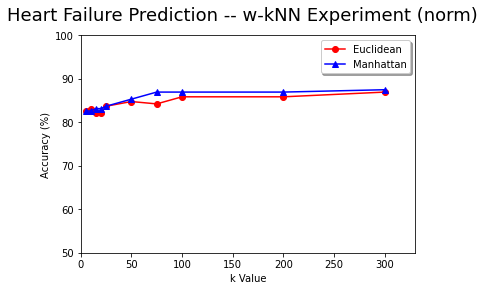

Best Euclidean k (weighted):  300
Best Euclidean accuracy (weighted):  0.8695652173913043
Best Manhattan k (weighted):  300
Best Manhattan accuracy (weighted):  0.875


In [ ]:
# w-kNN experiment with normalization
w_k_vals = [5,10,15,20,25,50,75,100,200,300]
w_kNN_e_accuracies = []
w_kNN_m_accuracies = []
best_we_accuracy = 0
best_k_we = 0
best_wm_accuracy = 0
best_k_wm = 0
current_accuracy = 0
current_accuracy2 = 0

# Euclidean Distance
for k in w_k_vals:
  w_kNN_e = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
  w_kNN_e.fit(train_data_normalized, train_sln)
  w_kNN_e_pred = w_kNN_e.predict(test_data_normalized)
  current_accuracy = metrics.accuracy_score(test_sln, w_kNN_e_pred)
  if current_accuracy > best_we_accuracy:
    best_k_we = k
    best_we_accuracy = current_accuracy
  w_kNN_e_accuracies.append(current_accuracy*100)

# Manhattan Distance
for k in w_k_vals:
  w_kNN_m = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
  w_kNN_m.fit(train_data_normalized, train_sln)
  w_kNN_m_pred = w_kNN_m.predict(test_data_normalized)
  current_accuracy2 = metrics.accuracy_score(test_sln, w_kNN_m_pred)
  if current_accuracy2 > best_wm_accuracy:
    best_k_wm = k
    best_wm_accuracy = current_accuracy2
  w_kNN_m_accuracies.append(current_accuracy2*100)

#graph
plt.suptitle('Heart Failure Prediction -- w-kNN Experiment (norm)',fontsize=18)
plt.xlabel('k Value')
plt.ylabel('Accuracy (%)')
plt.plot(k_vals,w_kNN_e_accuracies,'ro-',label='Euclidean')
plt.plot(k_vals,w_kNN_m_accuracies,'b^-',label='Manhattan')
plt.legend(loc='best', shadow=True)
plt.axis([0,330,50,100])
plt.show()

#Conclusion
print("Best Euclidean k (weighted): ", best_k_we)
print("Best Euclidean accuracy (weighted): ", best_we_accuracy)
print("Best Manhattan k (weighted): ", best_k_wm)
print("Best Manhattan accuracy (weighted): ", best_wm_accuracy)

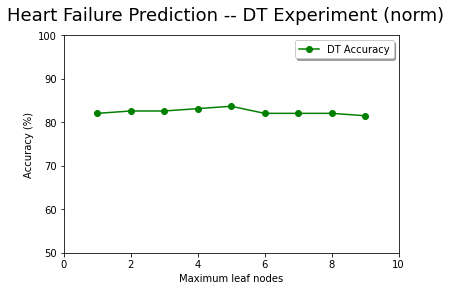

Best tree depth:  10
Best depth accuracy:  0.8152173913043478
Best leaf nodes:  5
Best leaf accuracy:  0.8369565217391305


In [ ]:
# Decision Tree experiment with normalization
depths = [3,4,5,6,7,8,9,10,11,12]
depths_accuracy = []
best_depth = 0
best_depth_accuracy = 0
current_accuracy = 0
current_accuracy2 = 0

for depth in depths:
  dt = tree.DecisionTreeClassifier(criterion='entropy')
  dt.fit(train_data_normalized, train_sln)
  dt_pred = dt.predict(test_data_normalized)
  current_accuracy = metrics.accuracy_score(test_sln, dt_pred)
  if current_accuracy > best_depth_accuracy:
    best_depth = depth
    best_depth_accuracy = current_accuracy
  depths_accuracy.append(current_accuracy*100)

leaf_nodes = [1,2,3,4,5,6,7,8,9]
leaf_accuracy = []
best_leaf = 0
best_leaf_accuracy = 0

for leaf in leaf_nodes:
  dt2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
  dt2.fit(train_data_normalized, train_sln)
  dt2_pred = dt2.predict(test_data_normalized)
  current_accuracy2 = metrics.accuracy_score(test_sln, dt2_pred)
  if current_accuracy2 > best_leaf_accuracy:
    best_leaf = leaf
    best_leaf_accuracy = current_accuracy2
  leaf_accuracy.append(current_accuracy2*100)

#graph
plt.suptitle('Heart Failure Prediction -- DT Experiment (norm)',fontsize=18)
plt.xlabel('Maximum leaf nodes')
plt.ylabel('Accuracy (%)')
plt.plot(leaf_nodes, leaf_accuracy,'go-',label='DT Accuracy')
plt.legend(loc='best', shadow=True)
plt.axis([0,10,50,100])
plt.show()

#Conclusion
print("Best tree depth: ", best_depth)
print("Best depth accuracy: ", best_depth_accuracy)
print("Best leaf nodes: ", best_leaf)
print("Best leaf accuracy: ", best_leaf_accuracy)

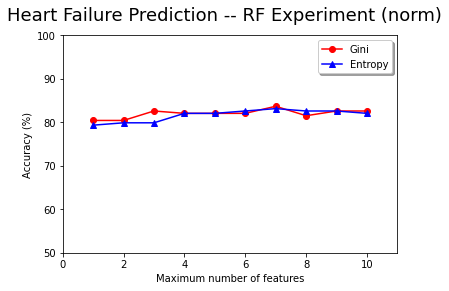

Best Gini m:  7
Best Gini accuracy:  0.8369565217391305
Best Entropy m:  7
Best Entropy accuracy:  0.8315217391304348


In [ ]:
# Random Forest Test with normalization
maxfeatures = [1,2,3,4,5,6,7,8,9,10]
rf1_gini_accuracies = []
rf2_entropy_accuracies = []
best_gini_accuracy = 0
best_entropy_accuracy = 0
best_gini_features = 0
best_entropy_features = 0
current_accuracy = 0
current_accuracy2 = 0

# Gini criterion
for m in maxfeatures:
  rf1 = ensemble.RandomForestClassifier(max_features = m)
  rf1.fit(train_data_normalized, train_sln)
  rf1_pred = rf1.predict(test_data_normalized)
  current_accuracy = metrics.accuracy_score(test_sln, rf1_pred)
  if current_accuracy > best_gini_accuracy:
    best_gini_features = m
    best_gini_accuracy = current_accuracy
  rf1_gini_accuracies.append(current_accuracy*100)

# Entropy criterion
for m in maxfeatures:
  rf2 = ensemble.RandomForestClassifier(criterion='entropy', max_features = m)
  rf2.fit(train_data_normalized, train_sln)
  rf2_pred = rf2.predict(test_data_normalized)
  current_accuracy2 = metrics.accuracy_score(test_sln, rf2_pred)
  if current_accuracy2 > best_entropy_accuracy:
    best_entropy_features = m
    best_entropy_accuracy = current_accuracy2
  rf2_entropy_accuracies.append(current_accuracy2*100)

#graph
plt.suptitle('Heart Failure Prediction -- RF Experiment (norm)',fontsize=18)
plt.xlabel('Maximum number of features')
plt.ylabel('Accuracy (%)')
plt.plot(maxfeatures,rf1_gini_accuracies,'ro-',label='Gini')
plt.plot(maxfeatures,rf2_entropy_accuracies,'b^-',label='Entropy')
plt.legend(loc='best', shadow=True)
plt.axis([0,11,50,100])
plt.show()

#Conclusion
print("Best Gini m: ", best_gini_features)
print("Best Gini accuracy: ", best_gini_accuracy)
print("Best Entropy m: ", best_entropy_features)
print("Best Entropy accuracy: ", best_entropy_accuracy)

# Results
After you conduct your learning experiment, summarize the results you got. Include visualizations (i.e. graphs) where appropriate.  How did you find the best k, n, m or other variables that you needed to tune.

<i>To tune each of these models, I created a loop that would track the results of the specifc parameter being tuned (different values of k, the different numbers of features, etc). Then, within each of these loops I created a vairable that would track the most efficient outcome from these experiments. This would allow me to quickly see where the model was performing the best. Lastly, after the loop was finished, I graphed the results of the experiments to see its trend over the course of different values.

Overall, each machine learning model was able to accurately predict the prescence of heart disease over 80% of the time. This is a significant improvement from the baseline performance, which only predicted accurate results 50% of the time. The model that performed the best was the k-NN experiment using Manhattan distance, particularly after the normalization of the training and testing data. This experiment resulted in an accuracy of roughly 89% at 300 nearest neighbors.

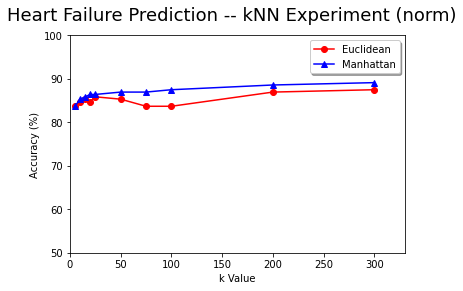

In [ ]:
# k-NN experiment with normalization graph
plt.suptitle('Heart Failure Prediction -- kNN Experiment (norm)',fontsize=18)
plt.xlabel('k Value')
plt.ylabel('Accuracy (%)')
plt.plot(k_vals,kNN_e_accuracies,'ro-',label='Euclidean')
plt.plot(k_vals,kNN_m_accuracies,'b^-',label='Manhattan')
plt.legend(loc='best', shadow=True)
plt.axis([0,330,50,100])
plt.show()

The other normalized k-NN experiments, both weighted and unweighted, were all around 87% accuracy and performed the next best among all models. The respective accuracies from each of these k-NN experiments made 2-3% improvements from the non-standardized data, emphasizing the importance of normalization on this form of test. <br>
Regarding the decision tree and random forest experiments, they did not perform as efficient by comparison. The most successful model was an entropy-based random forest model on normalized data that tested on eight features. This model produced an accuracy of 84%.

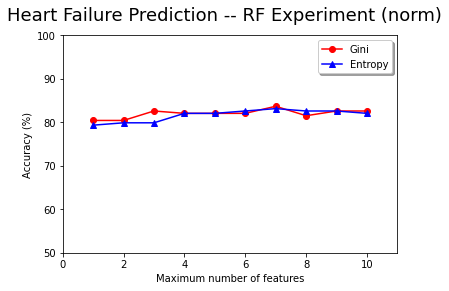

In [ ]:
# RF entropy experiment with normalization graph
plt.suptitle('Heart Failure Prediction -- RF Experiment (norm)',fontsize=18)
plt.xlabel('Maximum number of features')
plt.ylabel('Accuracy (%)')
plt.plot(maxfeatures,rf1_gini_accuracies,'ro-',label='Gini')
plt.plot(maxfeatures,rf2_entropy_accuracies,'b^-',label='Entropy')
plt.legend(loc='best', shadow=True)
plt.axis([0,11,50,100])
plt.show()

Despite its lower performance, the random forest algorithm was able to identify three features that were most impactful in predicting heart disease. These features were `ST_Slope_Up`, `Oldpeak`, and `Age`. This largely explains why the decision tree models did not perform any better with a larger number of features, considering each of the remaining variables prduced a similar information gain.

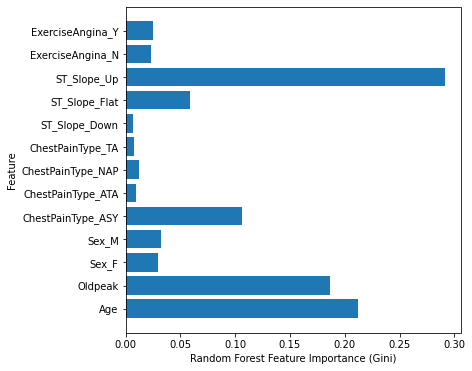

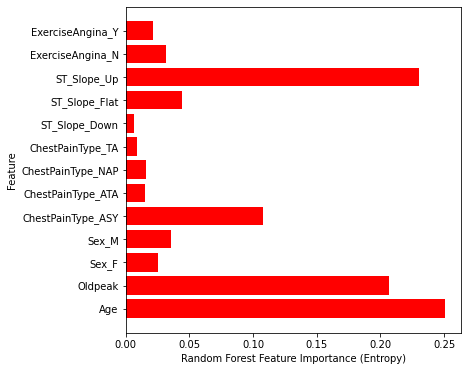

In [ ]:
#Feature importances chart
#Gini RF
index = range(len(predictors))
plt.figure(figsize=(6,6))
plt.barh(index, rf1.feature_importances_) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors)
plt.xlabel("Random Forest Feature Importance (Gini)")
plt.show()

#Entropy RF
plt.figure(figsize=(6,6))
plt.barh(index, rf2.feature_importances_, color='red') #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors)
plt.xlabel("Random Forest Feature Importance (Entropy)")
plt.show()

Another conclusion from the decision tree and random forest experiments that proved vital was the marginal impact of normalization. As a whole, none of the experiments benefited from normalized data, at best improving accuracy by one percentage point. <br>
In general the use of a k-NN or weighted k-NN algorithms appears most reliable for this dataset, especially if the predictor data is normalized.

# Bumps in the Road:
What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?


The first major challenge I encountered was prepping my data set. Although this data was already clean, I needed to decide which features I would use to construct my model. I wanted to find a good mix of numerical and categorical variables, as well as ones that appeared to be impactful on predicting heart disease. In the end I used some general research on heart disease and my intution to determine which variables I should analyze. <br><br>
The next major challenge I encountered was tuning variables within my first machine learning test. I tackled this challenge by first running a normal test without tuning, and then turned that result into a loop that would graph the results of the tuned variable. <br><br>
The last major challenge I encountered was researching the different machine learning experiments to see which parameters would produce the most accurate results. I wanted to ensure I was tuning elements that would make a positive impact on my model, so through some trial and error and browsing of the sklearn API website, I was able to make my decision.

# Conclusions
What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

By performing experiments on various machine learning models, it can be concluded that there are several factors that will predict the appearance of heart disease with high accuracy -- `Age`, `Sex`, `ChestPainType`, `Oldpeak`, `ST_Slope`, and `ExerciseAngina`. After conducting an intial experiment with no machine learning algorithms applied, the predictor variables performed no better than chance alone, averaging roughly 50% success. However, after running several experiments on four different machine learning models, it can be concluded that these variables will predict the appearance of heart disease with roughly 80-90% accuracy. This is a very impressive and significant improvement from the intial experiment, proving that there are certain signs that will indicate with high confidence if a person has heart disease. <br> <br>
The experiment that performed the best was the k-Nearest Neighbors (kNN) algorithm on normalized data, achieving an accuracy of roughly 89% at 300 neighbors. This is logical considering the nature of this dataset, with many of the variables being on similar scales and holding somewhat equal importance. In addition, since diagnoses in medicine can vary from individual to individual, having a large pool of neighbors to compare with would be beneficial for this algorithm, especially on a standardized scale. Overall, the kNN experiments (weighted and unweighted) performed better than that of the decision tree experiments on all accounts, achieving 87% accuracy on average. <br> <br>
One of the most surprising results from this project was the poor performance of the decision tree and random forest algorithms. The highest accuracy out of this set of algorithms was 84%, acheived by the random forest algorithm on normalized and non-normalized data. Upon further analysis, it can be explained why these algorithms performed poorly. By observing the feature importances chart generated by this algorithm, there were only three variables that appeared to provide a significant information gain (`ST_Slope_Up`, `Oldpeak`, and `Age`). This was also confirmed by the deicision tree experiment, where `max_tree_depth` was a tuned parameter that indicated three levels of leaf nodes results in the most accurate results. Creating any larger trees would ultimately result in overfitting, and not perform as well in the real world. The poor results of these algorithms surprises me considering many fields of science prefer the use of decision trees for the explanation of an event. While the benefits of readability are evident, the ultimate performance of this data do not correlate as nicely. <br><br>
In general, medical dianoses can be complex a system of equations that attempt to weigh an individual's symptoms. In rare cases there are anomolies, which  ultimately hurt the effectiveness of a simple decision tree over time. Therefore, the benefits of comparing large numbers of individuals against each other at once (kNN) outweigh the costs of a more cryptic decision process. Even though decision trees provide the benefit of identifying the most important features, a kNN algorithm would be best suited to use these features in its own experiment, weight them accordingly, and analyze them against a sample to formulate its conclusion.